# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to:


*  Apply  Leave - one - out  method 
*  Tune the hyper parameters of MLP Classifier.

In [1]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="800" height="300" controls>
  <source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/23FEB/loo.mp4" type="video/mp4">
</video>
""")

## Dataset

### Description:

The MNIST dataset contains: 

1. 60,000 Handwritten digits as training samples and 10,000 Test samples, 
which means each digit occurs 6000 times in the training set and 1000 times in the testing set. (approximately). 
2. Each image is Size Normalized and Centered 
3. Each image is 28 X 28 Pixel with 0-255 Gray Scale Value. 
4. That means each image is represented as 784 (28 X28) dimension vector where each value is in the range 0- 255.



### History

Yann LeCun (Director of AI Research, Facebook, Courant Institute, NYU) was given the task of identifying the cheque numbers (in the 90’s) and the amount associated with that cheque without manual intervention. That is when this dataset was created which raised the bars and became a benchmark.

Yann LeCun and Corinna Cortes (Google Labs, New York) hold the copyright of MNIST dataset, which is a subset of the original NIST datasets. This dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license. 

It is the handwritten digits dataset in which half of them are written by the Census Bureau employees and remaining by the high school students. The digits collected among the Census Bureau employees are easier and cleaner to recognize than the digits collected among the students.


### Challenges

Now, if you notice the images below, you will find that between 2 characters there are always certain similarities and differences. To teach a machine to recognize these patterns and identify the correct output.

![altxt](https://www.researchgate.net/profile/Radu_Tudor_Ionescu/publication/282924675/figure/fig3/AS:319968869666820@1453297931093/A-random-sample-of-6-handwritten-digits-from-the-MNIST-data-set-before-and-after.png)

Hence, all these challenges make this a good problem to solve in Machine Learning.


## AI / ML Technique

#### Leave One Out

Leave One Out is a special form of Cross-Validation. In this method each sample is used once as a test set while the remaining samples for the training set. A generalization error estimate is obtained by repeating this procedure for each of the training points available, averaging the results.

## Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [5]:
#@title Run this cell to complete the setup for this Notebook  
from IPython import get_ipython

ipython = get_ipython()
  
notebook="BLR_M2W6E16_Leaveoneout" #name of the notebook
def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing the packages

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

In [0]:
import warnings
warnings.simplefilter('default')

**Loading the dataset from sklearn package </br>
NOTE: We are using only 3 classes because Leave-one-out training would take a huge time if all the 10 classes were considered**

In [0]:
## Loading the dataset (n_class variable defines the number of classes to choose)
digits = datasets.load_digits(n_class=3)

## storing the data in x
X = digits.data
## Storing the target data into y
y = digits.target

In [10]:
X.shape

(537, 64)

In [11]:
# Creating the object
loo = LeaveOneOut()
#Returns the number of splitting iterations in the cross-validator
loo.get_n_splits(X)

537

In [0]:
### hyper parameters
# activation
a = ["identity","logistic","tanh","relu"]
#solvers
s = ["lbfgs","sgd","adam"]
#learning rate
lr = [0.0001,0.001,0.1]
#hidden layers
h = [(5,2),(3,2),(6,3),(7,2)]

In [0]:
#function to Create MLP classifier object with hyper parameters
def mlp(a,s,h,lr):
    clf = MLPClassifier(activation= a,solver= s,hidden_layer_sizes = h,learning_rate_init=lr)
    return clf 
#function to calculate the accuracy
def accuracy(actual,predicted):
    return accuracy_score(actual,predicted)

### Calculating Training and Testing accuracies 
* You may ignore the warning below as they are internal to the Sklearn's config and not related to the data
* The training using LOO below would take 25 mins to complete the execution for obvious reasons. (which is that we are considering each sample as a potential test sample)

In [14]:
warnings.simplefilter('default')
test_accuracy = []
train_accuracy = []
for i in range(5):
    k1 = np.random.randint(0,len(a))
    k2 = np.random.randint(0,len(s))
    k3 = np.random.randint(0,len(lr))
    k4 = np.random.randint(0,len(h))
    print("\nHyper-parameters = \n activation = ", a[k1],    "\n solver = ", s[k2], "\n learning_rate_init = ", lr[k3],         "\n hidden_layer_sizes = ", h[k4])
    #calling the mlp function with random hyper paramters
    clf = mlp(a[k1],s[k2],h[k4],lr[k3])
    tempTrain = 0
    tempTest = 0
    for nbrOfSamples,(train_index, test_index) in enumerate(loo.split(X)):
    ## Splitting the data into train and test
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        ##fit the data into the model
        clf.fit(X_train,Y_train)
        ##predicting the values on the fitted model
        predTrain = clf.predict((X_train))
        ##Calculating the train accuracy
        tempTrain = tempTrain + accuracy(Y_train,predTrain)
        ##predict the values on the fitted model using test data
        predTest = clf.predict((X_test))
        ##Calculating the test accuracy
        tempTest = tempTest + accuracy(Y_test,predTest)
    ##Calculating the train accuracy
    print("nbr of samples", nbrOfSamples+1)
    train_accuracy.append(tempTrain*1.0/(nbrOfSamples+1))
    ##Calculating the test accuracy
    test_accuracy.append(tempTest*1.0/(nbrOfSamples+1))
    print("===========")
    print("(train,test) accuracy = ",tempTrain*1.0, tempTest*1.0)


Hyper-parameters = 
 activation =  identity 
 solver =  sgd 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (3, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

nbr of samples 537
(train,test) accuracy =  536.7611940298515 533.0

Hyper-parameters = 
 activation =  logistic 
 solver =  lbfgs 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (7, 2)
nbr of samples 537
(train,test) accuracy =  504.2108208955231 503.0

Hyper-parameters = 
 activation =  tanh 
 solver =  adam 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (3, 2)
nbr of samples 537
(train,test) accuracy =  350.28544776119463 339.0

Hyper-parameters = 
 activation =  identity 
 solver =  sgd 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (5, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) rea

nbr of samples 537
(train,test) accuracy =  178.0000000000012 178.0

Hyper-parameters = 
 activation =  tanh 
 solver =  lbfgs 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (3, 2)
nbr of samples 537
(train,test) accuracy =  430.5317164179098 411.0


In [17]:
print([each for each in loo.split(X)])

[(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 

#### Plotting the data

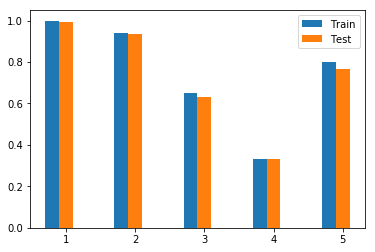

In [18]:
xx = np.array(range(1,6))
plt.bar(xx-0.2,train_accuracy,width=0.2)
plt.bar(xx, test_accuracy,width=0.2)
plt.legend(["Train","Test"])
plt.show()

#### Ungraded Exercise 1

vary the hidden layers, learning rate values  and observe the changes

#### Please answer the questions below to complete the experiment:

In [0]:
#@title The number of test samples in a given iteration, after LOO split, can be greater than 1?  { run: "auto", form-width: "500px", display-mode: "form" }
Answer="FALSE" #@param["TRUE","FALSE"]

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = " test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [23]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 4197
Date of submission:  27 Apr 2019
Time of submission:  10:00:12
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ResourceWarning: unclosed file <_io.BufferedReader name='BLR_M2W6E16_Leaveoneout.ipynb'>
  This is separate from the ipykernel package so we can avoid doing imports until
